<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>BESLISSINGSBOOM: HARTAANDOENING</h1>    
    </font>
</div>

Hart-en vaatziekten vormen een belangrijke doodsoorzaak. Hartfalen bv. is een veel voorkomende aandoening.

De dataset bevat waarden voor 11 parameters die kunnen gebruikt worden om een mogelijke hartziekte te voorspellen. Een hoge bloeddruk, diabetes, een verhoogde cholesterol zijn bv. gekende factoren die het rsisico op een hartaandoening verhogen. 

Deze dataset is eigenlijk een combinatie van 5 datasets uit de VS en Europa. 
en bevat waarden van 918 personen.

### Opdracht
Kies 5 parameters en stel op basis van die parameters een beslisingsboom op die een hartziekte voorspelt. 

### Voorbeeldoplossing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

In [2]:
hart = pd.read_csv("data/heart.csv") 

In [3]:
hart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
# categorische variabelen numeriek maken
hart["Sex"]= hart["Sex"].replace("F", 0)
hart["Sex"]= hart["Sex"].replace("M", 1)
hart["ChestPainType"]= hart["ChestPainType"].replace("ASY", 1)
hart["ChestPainType"]= hart["ChestPainType"].replace("ATA", 2)
hart["ChestPainType"]= hart["ChestPainType"].replace("NAP", 3)
hart["ChestPainType"]= hart["ChestPainType"].replace("TA", 4)
hart["RestingECG"]= hart["RestingECG"].replace("Normal", 0)
hart["RestingECG"]= hart["RestingECG"].replace("ST", 1)
hart["RestingECG"]= hart["RestingECG"].replace("LVH", 2)
hart["ExerciseAngina"]= hart["ExerciseAngina"].replace("N", 0)
hart["ExerciseAngina"]= hart["ExerciseAngina"].replace("Y", 1)
hart["ST_Slope"]= hart["ST_Slope"].replace("Up", 1)
hart["ST_Slope"]= hart["ST_Slope"].replace("Flat", 0)
hart["ST_Slope"]= hart["ST_Slope"].replace("Down", -1)

In [5]:
hart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,1,138,214,0,0,108,1,1.5,0,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,0,132,0,1.2,0,1
914,68,1,1,144,193,1,0,141,0,3.4,0,1
915,57,1,1,130,131,0,0,115,1,1.2,0,1
916,57,0,2,130,236,0,2,174,0,0.0,0,1


In [6]:
hart = np.array(hart)

In [7]:
hart

array([[40. ,  1. ,  2. , ...,  0. ,  1. ,  0. ],
       [49. ,  0. ,  3. , ...,  1. ,  0. ,  1. ],
       [37. ,  1. ,  2. , ...,  0. ,  1. ,  0. ],
       ...,
       [57. ,  1. ,  1. , ...,  1.2,  0. ,  1. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  3. , ...,  0. ,  1. ,  0. ]])

In [8]:
# beschouwde parameters zijn 'leeftijd', 'aantal' en 'start'
# beschouwde parameters staan in resp. kolom ) 0, 1, 2, ..., 10 van matrix
# elke rij komt overeen met één persoom
# laatste kolom geeft of persoon hartziekte heeft ('1') of niet ('0').

In [9]:
# parameters en klasse onderscheiden
parameters = hart[:, :11]        # laatste 3 kolommen van matrix zijn beschouwde parameters
klasse = hart[:, 11]             # laatste kolom zijn klasse waartoe persoon behoort

In [10]:
print(parameters)

[[40.   1.   2.  ...  0.   0.   1. ]
 [49.   0.   3.  ...  0.   1.   0. ]
 [37.   1.   2.  ...  0.   0.   1. ]
 ...
 [57.   1.   1.  ...  1.   1.2  0. ]
 [57.   0.   2.  ...  0.   0.   0. ]
 [38.   1.   3.  ...  0.   0.   1. ]]


In [11]:
print(klasse)

[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.

In [12]:
# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(parameters, klasse)                           # boom genereren die overeenkomt met data

DecisionTreeClassifier()

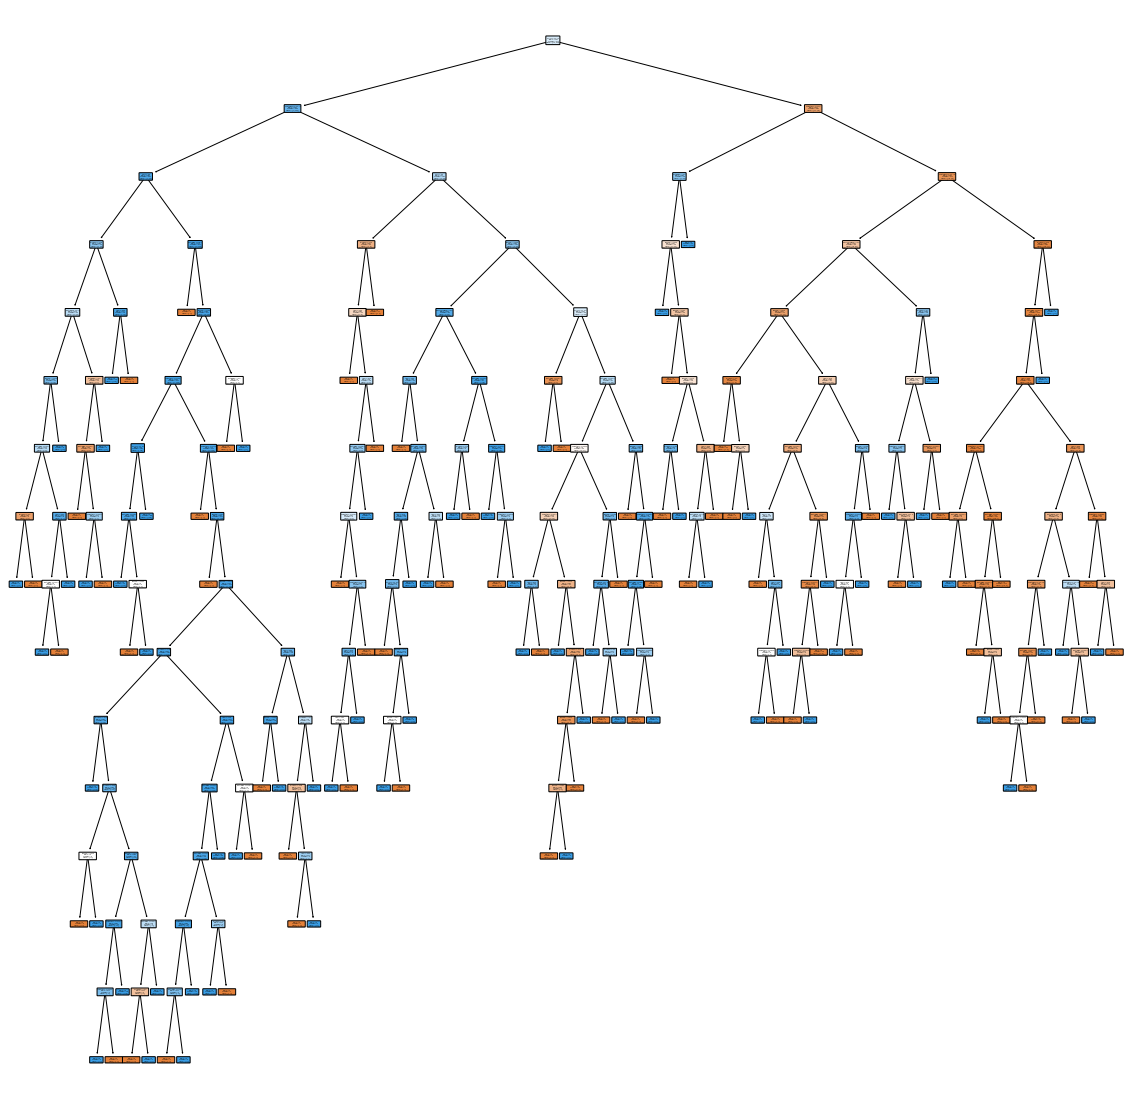

In [13]:
plt.figure(figsize=(20,20))  
tree.plot_tree(beslissingsboom, 
               class_names=["geen hartziekte", "hartziekte"], 
               feature_names=["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR" ,"ExerciseAngina", "Oldpeak", "ST_Slope"], 
               filled=True, rounded=True)
plt.show()

### Referenties

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Geraadpleegd op 10 december 2021 via <br>
&nbsp; &nbsp; &nbsp; &nbsp; https://www.kaggle.com/fedesoriano/heart-failure-prediction

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 